# Feature Selection
1. Wrapper
2. Filter
3. Embedded

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.font_manager as fm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# 라이브러리 호출
import pandas as pd
from sklearn.model_selection import train_test_split

# 경고창 제거
import warnings
warnings.filterwarnings('ignore')

In [4]:
# plt.rc('font', family='Malgun Gothic') # 폰트 지정
# plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# %config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [5]:
train_df = pd.read_csv('../DATA/two_month_features.csv',index_col=0)
train_df.head()
test_df = pd.read_csv("../DATA/test_features_2month.csv",index_col=0)
test_df.head()

,시장베이시스,이론베이시스,괴리율,원위안 야간변동율,원엔 야간변동율,KOSPI 전날변동율,KOSPI 야간변동율,KS200 전날변동율,KS200 야간변동율,NAS 야간변동율,...,JNIV 종가변동율,JNIV 전날변동율,JNIV 전날변화량,CD 전날변동율,CD 전날변화량,KOSPI 오전변동율,KOSPI 오전변화량,KS200 오전변동율,KS200 오전변화량,VKOSPI_Label
2023-10-10,1.56,2.31,-0.23,0.070,0.056,0.21,1.156,0.11,1.264,0.39,...,-8.44,1.214,0.76,-0.261,0.01,-0.289,15.89,-0.317,2.25,1.0
2023-10-11,2.34,2.17,0.05,0.109,0.105,-0.26,1.413,0.05,1.520,0.58,...,-1.78,-1.964,0.92,0.000,0.00,-0.028,16.21,0.052,2.00,1.0
2023-10-12,2.26,2.18,0.02,0.093,0.105,1.98,0.617,1.76,0.662,0.71,...,3.03,1.983,0.69,0.000,0.00,0.140,10.62,0.238,1.71,1.0
2023-10-13,1.60,2.17,-0.17,0.043,0.036,1.21,-0.765,1.27,-0.833,-0.63,...,-1.99,1.423,0.86,0.000,0.00,0.053,12.23,0.046,1.90,0.0
2023-10-16,2.08,2.11,-0.01,0.081,0.124,-0.95,-0.559,-0.94,-0.513,-1.23,...,0.05,0.878,0.93,0.000,0.00,-0.206,15.99,-0.298,2.50,0.0


In [6]:
X_train = train_df.drop(columns='VKOSPI_Label',axis=1)
y_train = train_df[['VKOSPI_Label']]
X_val = test_df.drop(columns='VKOSPI_Label',axis=1)
y_val = test_df[['VKOSPI_Label']]

In [7]:
# 표준화
features_to_standardize = ['KOSPI 전날변동율','KOSPI 야간변동율', 'KS200 전날변동율', 'KS200 야간변동율']
scaler_standardize = StandardScaler()
X_train = scaler_standardize.fit_transform(X_train[features_to_standardize])
X_val = scaler_standardize.transform(X_val[features_to_standardize])

X_train = pd.DataFrame(X_train, columns=features_to_standardize)
X_val = pd.DataFrame(X_val, columns=features_to_standardize)

## RF 기반 feature importance

In [8]:
# Feature_Importances
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

rfc.feature_importances_

ftr_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
sorted_feature_importance = ftr_importances.sort_values(ascending=True)

data = sorted_feature_importance
importance = pd.DataFrame(data, columns=['feature importances'])
importance

,feature importances
KS200 야간변동율,0.140358
KOSPI 야간변동율,0.158954
KOSPI 전날변동율,0.347136
KS200 전날변동율,0.353552


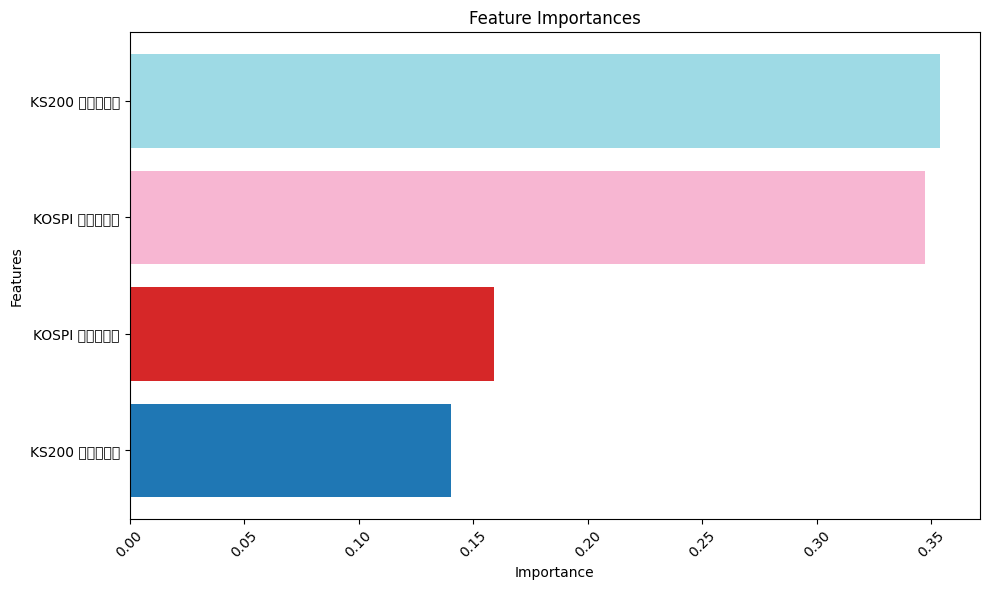

In [9]:
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, len(importance)))

plt.barh(importance.index, importance['feature importances'], color=colors)  # Changed to barh for horizontal bar chart
plt.ylabel('Features')  # Changed to 'Features' for Y-axis label
plt.xlabel('Importance')  # Changed to 'Importance' for X-axis label
plt.title('Feature Importances')

# Rotating x labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Logit기반 피쳐 갯수 선정

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()


logit = SelectFromModel(LogisticRegression())
logit.fit(X_train, y_train)
logit_support = logit.get_support()
lr_feature = X_train.loc[:,logit_support].columns.tolist()

In [11]:
print(lr_feature)
print(len(lr_feature))

['KOSPI 전날변동율', 'KS200 전날변동율']
2


## 1. Wrapper : 모델링을 돌리면서 변수를 선택하는 방법

- Forward Selection(전진 선택) : 변수가 없는 상태로 시작하며 반복할 때마다 가장 중요한 변수를 추가하여 더 이상 성능의 향상이 없을 때까지 변수를 추가한다.
- Backward Elimination(후방 제거) : 모든 변수를 가지고 시작하며, 가장 덜 중요한 변수를 하나씩 제거하면서 모델의 성능을 향상시킨다. 더 이상 성능의 향상이 없을 때까지 반복한다.
- Stepwise Selection(단계별 선택): Foward Selection 과 Backward Elimination 을 결합하여 사용하는 방식으로, 모든  변수를 가지고 시작하여 가장 도움이 되지 않는 변수를 삭제하거나, 모델에서 빠져있는 변수 중에서 가장 중요한 변수를 추가하는 방법이다. 이와 같이 변수를 추가 또는 삭제를 반복한다. 반대로 아무것도 없는 모델에서 출발해 변수를 추가, 삭제를 반복할 수도 있다.

In [12]:
# Forward Selection
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Forward feature selection 수행
selected_features = []
best_score = 0

while len(selected_features) < X_train.shape[1]:
    best_feature = None
    best_model = None
    best_score_local = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_val)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nForward selected features:")
Forward = selected_features


Selected feature: KOSPI 야간변동율, Accuracy: 0.4737

Forward selected features:


In [13]:
# Backward Elimination
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Backward feature selection 수행
selected_features = X_train.columns.tolist()
best_score = 0

while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_val[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_val)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Backward = selected_features


Removed feature: KOSPI 전날변동율, Accuracy: 0.3684
Removed feature: KS200 전날변동율, Accuracy: 0.4737

Final selected features:


In [14]:
# # Stepwise Selection
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

# # Stepwise feature selection 수행
# selected_features = []
# best_score = 0

# # Forward step
# while len(selected_features) < X.shape[1]:
#     best_feature = None
#     best_model = None
#     best_score_local = 0

#     for feature in X_train.columns:
#         if feature not in selected_features:
#             features = selected_features + [feature]
#             X_train_selected = X_train[features]
#             X_val_selected = X_val[features]

#             model = LogisticRegression()
#             model.fit(X_train_selected, y_train)
#             score = model.score(X_val_selected, y_val)

#             if score > best_score_local:
#                 best_score_local = score
#                 best_feature = feature
#                 best_model = model

#     if best_score_local > best_score:
#         selected_features.append(best_feature)
#         best_score = best_score_local
#         print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

#     else:
#         break

# # Backward step
# while len(selected_features) > 0:
#     worst_feature = None
#     best_model = None
#     best_score_local = 0

#     for feature in selected_features:
#         features = selected_features.copy()
#         features.remove(feature)

#         X_train_selected = X_train[features]
#         X_val_selected = X_val[features]

#         model = LogisticRegression()
#         model.fit(X_train_selected, y_train)
#         score = model.score(X_val_selected, y_val)

#         if score > best_score_local:
#             best_score_local = score
#             worst_feature = feature
#             best_model = model

#     if best_score_local > best_score:
#         selected_features.remove(worst_feature)
#         best_score = best_score_local
#         print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

#     else:
#         break

# print("\nFinal selected features:")
# Stepwise = selected_features


## 3. Embedded
- Lasso, Ridge, Elastic Net 등 내장함수 사용하여 변수를 선택하는 방법

In [15]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.7750


In [16]:
lasso_best = LogisticRegression(C=8, penalty='l1', solver='liblinear').fit(X_train, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
0,KOSPI 전날변동율,-1.899971
1,KOSPI 야간변동율,-0.256001
2,KS200 전날변동율,-0.996875


In [17]:
# 라쏘에서 선택된 피처
lasso = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso

Lasso에서 선택된 피처 수 3 개


['KOSPI 전날변동율', 'KOSPI 야간변동율', 'KS200 전날변동율']

In [18]:
list_Forward = list(Forward)
list_Backward = list(Backward)
# list_Stepwise = list(Stepwise)
list_lasso = list(lasso)
list_col_all = X_train.columns

In [19]:
def func_Forward(x):
    if x in list_Forward:
        return 1
    else:
        return 0
    
def func_Backward(x):
    if x in list_Backward:
        return 1
    else:
        return 0


# def func_Stepwise(x):
#     if x in list_Stepwise:
#         return 1
#     else:
#         return 0

    
def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

In [20]:
# 2번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
#feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["lasso"]
feature_final = feature_counts[feature_counts["total"]>=2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 1


,Feature,Forward,Backward,lasso,total
1,KOSPI 야간변동율,1,1,1,3


In [21]:
feature_final[['Feature']]
np.array(feature_final[['Feature']])

array([['KOSPI 야간변동율']], dtype=object)

In [22]:
# 3번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
# feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["lasso"]
feature_final = feature_counts[feature_counts["total"]>=3]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 1


,Feature,Forward,Backward,lasso,total
1,KOSPI 야간변동율,1,1,1,3


In [23]:
X_train = X_train[['원엔 야간변동율',
       'KS200 야간변동율',
       'NAS 당일변동율',
       'P/C Ratio',
       'S&P 당일변화량',
       '원달러 야간변동율',
       'VIX 당일변화량',
       'JNIV 종가변동율',
       'JNIV 전날변동율',
       'KS200 오전변동율']]
X_val = X_val[['원엔 야간변동율',
       'KS200 야간변동율',
       'NAS 당일변동율',
       'P/C Ratio',
       'S&P 당일변화량',
       '원달러 야간변동율',
       'VIX 당일변화량',
       'JNIV 종가변동율',
       'JNIV 전날변동율',
       'KS200 오전변동율']]

KeyError: "['원엔 야간변동율', 'NAS 당일변동율', 'P/C Ratio', 'S&P 당일변화량', '원달러 야간변동율', 'VIX 당일변화량', 'JNIV 종가변동율', 'JNIV 전날변동율', 'KS200 오전변동율'] not in index"

In [ ]:
from sklearn.model_selection import GridSearchCV

def model_basic_with_gridsearch(X_train, y_train, X_val, y_val):
    # 모델 및 해당 하이퍼파라미터 그리드 정의
    models_and_grids = {
        LogisticRegression(): {
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1, 1, 10]
        },
        DecisionTreeClassifier(): {
            'max_depth': [1,3,7,10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        SVC(): {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        },
        RandomForestClassifier(): {
            'n_estimators': [5,10,15,20],
            'max_depth': [1,3,7,10],
            'min_samples_split': [2, 5, 10]
        },
        XGBClassifier(): {
            'n_estimators': [5,10,15,20,50,100],
            'learning_rate': [0.01, 0.1, 0.5]
        },
        LGBMClassifier(): {
            'n_estimators': [5,10,15,20,50,100],
            'learning_rate': [0.01, 0.1, 0.5]
        }
    }

    rdict = {'model': [], 'best_params': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

    for model, grid in models_and_grids.items():
        clf = GridSearchCV(model, grid, cv=5)
        clf.fit(X_train, y_train)
        best_model = clf.best_estimator_

        pred = best_model.predict(X_val)
        results = (round(accuracy_score(y_val, pred), 2),
                   round(precision_score(y_val, pred, average='weighted'), 2),
                   round(recall_score(y_val, pred, average='weighted'), 2),
                   round(f1_score(y_val, pred, average='weighted'), 2))

        rdict['model'].append(best_model.__class__.__name__)
        rdict['best_params'].append(clf.best_params_)
        rdict['accuracy'].append(results[0])
        rdict['precision'].append(results[1])
        rdict['recall'].append(results[2])
        rdict['f1_score'].append(results[3])

    rdf = pd.DataFrame(data=rdict)
    return rdf


In [ ]:
model_basic_with_gridsearch(X_train, y_train, X_val, y_val)